In [69]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [37]:
def make_date(date_str):
    m, d, y = date_str.split('/')
    m = int(m)
    d = int(d)
    y = int(y)
    if y > 13:
        y += 1900
    else: 
        y += 2000
    return dt.datetime(y, m, d)

In [38]:
movies = pd.read_csv("moviedata.csv", sep='\t', na_values=["Unknown", "Unkno"], parse_dates=[0], date_parser=make_date)

In [39]:
movies.head()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross
0,2012-03-09,John Carter,NaN,300000000,66439100.0,254439100.0
1,2007-05-25,Pirates of the Caribbean: At World's End,Buena Vista,300000000,309420425.0,960996492.0
2,2013-12-13,The Hobbit: There and Back Again,New Line,270000000,NaN,NaN
3,2012-12-14,The Hobbit: An Unexpected Journey,New Line,270000000,NaN,NaN
4,2010-11-24,Tangled,Buena Vista,260000000,200821936.0,586581936.0


In [40]:
movies["US Gross"].unique()


array([6.64391000e+07, 3.09420425e+08,            nan, ...,
       4.84820000e+04, 1.33800000e+03, 1.81041000e+05])

In [41]:
movies["Worldwide Gross"].unique()

array([2.54439100e+08, 9.60996492e+08,            nan, ...,
       2.04192800e+06, 7.16440000e+04, 2.40495000e+05])

In [44]:
movies.fillna(0, inplace=True)

In [45]:
movies.head()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross
0,2012-03-09,John Carter,0,300000000,66439100.0,254439100.0
1,2007-05-25,Pirates of the Caribbean: At World's End,Buena Vista,300000000,309420425.0,960996492.0
2,2013-12-13,The Hobbit: There and Back Again,New Line,270000000,0.0,0.0
3,2012-12-14,The Hobbit: An Unexpected Journey,New Line,270000000,0.0,0.0
4,2010-11-24,Tangled,Buena Vista,260000000,200821936.0,586581936.0


In [48]:
movies["Worldwide Gross"][movies['Worldwide Gross']==0.0] = movies["US Gross"]

C:\Users\Khemra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
movies[movies['Worldwide Gross']==0.0]

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross
2,2013-12-13,The Hobbit: There and Back Again,New Line,270000000,0.0,0.0
3,2012-12-14,The Hobbit: An Unexpected Journey,New Line,270000000,0.0,0.0
8,2012-07-20,The Dark Knight Rises,0,250000000,0.0,0.0
14,2010-12-31,The Lone Ranger,Buena Vista,215000000,0.0,0.0
15,2012-05-25,Men in Black 3,0,215000000,0.0,0.0
103,2012-11-16,"The Twilight Saga: Breaking Dawn, Part 2",0,136200000,0.0,0.0
187,2012-06-01,Snow White and the Huntsman,0,100000000,0.0,0.0
451,2012-06-15,Rock of Ages,0,70000000,0.0,0.0
507,2009-12-31,Foodfight!,Lion's Gate,65000000,0.0,0.0
713,2012-04-06,American Reunion,0,50000000,0.0,0.0


In [50]:
# Create function to get year only
def get_year(date):
    return date.year

In [51]:
movies["Year"] = movies.Release_Date.apply(lambda x: x.year)

In [52]:
print(movies.Year.min())
print(movies.Year.max())

1915
2013


In [53]:
movies.head()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross,Year
0,2012-03-09,John Carter,0,300000000,66439100.0,254439100.0,2012
1,2007-05-25,Pirates of the Caribbean: At World's End,Buena Vista,300000000,309420425.0,960996492.0,2007
2,2013-12-13,The Hobbit: There and Back Again,New Line,270000000,0.0,0.0,2013
3,2012-12-14,The Hobbit: An Unexpected Journey,New Line,270000000,0.0,0.0,2012
4,2010-11-24,Tangled,Buena Vista,260000000,200821936.0,586581936.0,2010


In [72]:
def make_month(date):
    return dt.datetime(year=date.year, month=date.month, day=1)

In [73]:
movies["Month"] = movies.Release_Date.apply(make_month)

In [74]:
movies_per_month = movies.groupby("Month")["Movie"].aggregate(len)

In [75]:
movies_per_month

Month
1915-02-01     1
1916-09-01     1
1916-12-01     1
1920-09-01     1
1925-01-01     1
1925-12-01     1
1927-08-01     1
1929-06-01     1
1930-01-01     1
1931-12-01     1
1933-02-01     1
1933-03-01     1
1933-04-01     1
1934-01-01     1
1935-09-01     1
1936-02-01     1
1936-06-01     1
1936-10-01     1
1937-12-01     1
1938-01-01     2
1939-01-01     2
1939-12-01     1
1940-01-01     2
1940-11-01     1
1941-10-01     1
1942-11-01     1
1943-01-01     1
1943-12-01     1
1944-01-01     1
1944-08-01     1
              ..
2010-05-01    13
2010-06-01    18
2010-07-01    14
2010-08-01    12
2010-09-01    15
2010-10-01    24
2010-11-01    16
2010-12-01    25
2011-01-01     7
2011-02-01     4
2011-03-01    11
2011-04-01    15
2011-05-01    16
2011-06-01    10
2011-07-01    14
2011-08-01    21
2011-09-01    20
2011-10-01    14
2011-11-01    13
2011-12-01     9
2012-01-01    11
2012-02-01     5
2012-03-01     7
2012-04-01     1
2012-05-01     1
2012-06-01     2
2012-07-01     1
2012-11-

In [59]:
movies["Profit"] = movies["Worldwide Gross"] -  movies["Budget"]

In [60]:
movies.head()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross,Year,Month,Profit
0,2012-03-09,John Carter,0,300000000,66439100.0,254439100.0,2012,2012-03-01,-45560900.0
1,2007-05-25,Pirates of the Caribbean: At World's End,Buena Vista,300000000,309420425.0,960996492.0,2007,2007-05-01,660996492.0
2,2013-12-13,The Hobbit: There and Back Again,New Line,270000000,0.0,0.0,2013,2013-12-01,-270000000.0
3,2012-12-14,The Hobbit: An Unexpected Journey,New Line,270000000,0.0,0.0,2012,2012-12-01,-270000000.0
4,2010-11-24,Tangled,Buena Vista,260000000,200821936.0,586581936.0,2010,2010-11-01,326581936.0


In [66]:
movies[movies["Month"]=='1915-02-01']

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross,Year,Month,Profit
3574,1915-02-08,The Birth of a Nation,0,110000,10000000.0,11000000.0,1915,1915-02-01,10890000.0


In [67]:
by_monthyear = movies.groupby("Month")
my_mean_profit = by_monthyear["Profit"].mean()
my_med_profit = by_monthyear["Profit"].median()

In [68]:
df = pd.DataFrame({"Mean Profit": my_mean_profit, "Median Profit": my_med_profit})
df

,Mean Profit,Median Profit
Month,,
1915-02-01,1.089000e+07,10890000.0
1916-09-01,-3.859070e+05,-385907.0
1916-12-01,7.800000e+06,7800000.0
1920-09-01,2.900000e+06,2900000.0
1925-01-01,2.175500e+07,21755000.0
1925-12-01,5.100000e+06,5100000.0
1927-08-01,-2.000000e+06,-2000000.0
1929-06-01,3.979000e+06,3979000.0
1930-01-01,-4.000000e+06,-4000000.0


In [77]:
counts = movies_per_month.aggregate(len)

AttributeError: 'int' object has no attribute 'head'

In [79]:
by_monthyear.head()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross,Year,Month,Profit
0,2012-03-09,John Carter,0,300000000,66439100.0,2.544391e+08,2012,2012-03-01,-4.556090e+07
1,2007-05-25,Pirates of the Caribbean: At World's End,Buena Vista,300000000,309420425.0,9.609965e+08,2007,2007-05-01,6.609965e+08
2,2013-12-13,The Hobbit: There and Back Again,New Line,270000000,0.0,0.000000e+00,2013,2013-12-01,-2.700000e+08
3,2012-12-14,The Hobbit: An Unexpected Journey,New Line,270000000,0.0,0.000000e+00,2012,2012-12-01,-2.700000e+08
4,2010-11-24,Tangled,Buena Vista,260000000,200821936.0,5.865819e+08,2010,2010-11-01,3.265819e+08
5,2007-05-04,Spider-Man 3,Sony,258000000,336530303.0,8.908753e+08,2007,2007-05-01,6.328753e+08
6,2009-07-15,Harry Potter and the Half-Blood Prince,Warner Bros.,250000000,301959197.0,9.344165e+08,2009,2009-07-01,6.844165e+08
7,2011-05-20,Pirates of the Caribbean: On Stranger Tides,Buena Vista,250000000,241063875.0,1.043664e+09,2011,2011-05-01,7.936639e+08
8,2012-07-20,The Dark Knight Rises,0,250000000,0.0,0.000000e+00,2012,2012-07-01,-2.500000e+08
9,2009-12-18,Avatar,20th Century Fox,237000000,760507625.0,2.783919e+09,2009,2009-12-01,2.546919e+09


In [83]:
counts = by_monthyear.aggregate(len)

In [84]:
counts.head()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross,Year,Profit
Month,,,,,,,,
1915-02-01,1,1,1,1,1.0,1.0,1,1.0
1916-09-01,1,1,1,1,1.0,1.0,1,1.0
1916-12-01,1,1,1,1,1.0,1.0,1,1.0
1920-09-01,1,1,1,1,1.0,1.0,1,1.0
1925-01-01,1,1,1,1,1.0,1.0,1,1.0


In [85]:
df["Count"] = movies_per_month

In [90]:
#df.insert(0, "Counts", df['Count'])
df

,Counts,Mean Profit,Median Profit,Count
Month,,,,
1915-02-01,1,1.089000e+07,10890000.0,1
1916-09-01,1,-3.859070e+05,-385907.0,1
1916-12-01,1,7.800000e+06,7800000.0,1
1920-09-01,1,2.900000e+06,2900000.0,1
1925-01-01,1,2.175500e+07,21755000.0,1
1925-12-01,1,5.100000e+06,5100000.0,1
1927-08-01,1,-2.000000e+06,-2000000.0,1
1929-06-01,1,3.979000e+06,3979000.0,1
1930-01-01,1,-4.000000e+06,-4000000.0,1


In [93]:
#del df['Count']
#del df['Median Profit']
df

,Counts,Mean Profit
Month,,
1915-02-01,1,1.089000e+07
1916-09-01,1,-3.859070e+05
1916-12-01,1,7.800000e+06
1920-09-01,1,2.900000e+06
1925-01-01,1,2.175500e+07
1925-12-01,1,5.100000e+06
1927-08-01,1,-2.000000e+06
1929-06-01,1,3.979000e+06
1930-01-01,1,-4.000000e+06


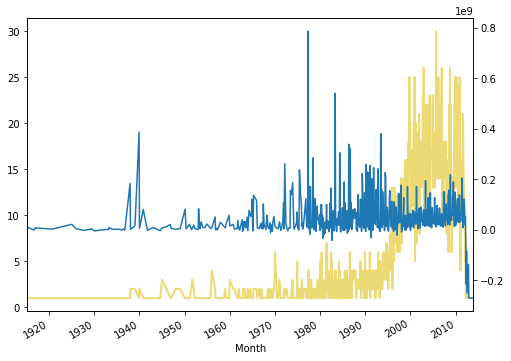

In [95]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

df.Counts.plot(ax=ax, linewidth=2, c='#EDDA74')
ax2 = df["Mean Profit"].plot(ax=ax, secondary_y=True)
